## `Image Processing`

In [108]:
from PIL import Image

In [111]:
## The Imges are in the form of DICOM format, and to this image i need a software, here i use Radient Ant Dicom Viewer.

## `Cancer Tumor in the Image`

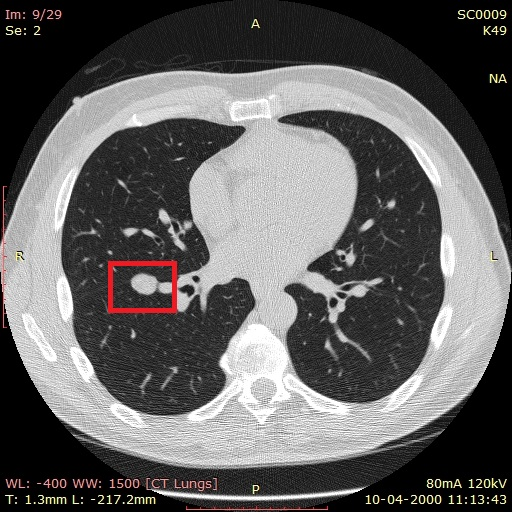

In [110]:
Image.open(r'C:\Users\Aakash Sharma\Desktop\AI\lung-cancer-project-20200201T093029Z-001\lung-cancer-project\lung_Images\cancer_new_data\Train\cancer\IMG-0001-00009 (5).jpg')

In [ ]:
##Import libraries
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
#from keras.layers import Dropout

In [94]:
## Initialising the CNN
classifier = Sequential()

In [95]:
## Convolution(64 feature detector of dimension 3 by 3), input shape 3 layer for color image)
classifier.add(Conv2D(64,(3,3),input_shape = (150,150,3), activation = 'relu'))
## MaxPooling
classifier.add(MaxPooling2D(pool_size = (2,2)))

## Add another layer
classifier.add(Conv2D(64,(3,3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2,2)))

## Add another layer
classifier.add(Conv2D(64,(3,3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2,2)))


In [96]:
## Flattening
classifier.add(Flatten())

In [97]:
## Fully connected ANN, Hidden ANN and output layer
classifier.add(Dense(units = 128, activation = 'relu'))
#classifier.add(Dropout(.25)) 

In [98]:
#output layer
classifier.add(Dense(units = 64, activation = 'relu'))

classifier.add(Dense(units = 1, activation = 'sigmoid'))

In [99]:
## Compliling
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [100]:
classifier.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 18496)            

### `Data importing and transforming and scaling`

In [101]:
## data importing and transforming and scaling
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)

# Image Generator do all the preprocessing task of the image or it will take care the image scaling and feed the data 
# and rescaling it.

## Scaling test data
##no  data augmentation
test_datagen = ImageDataGenerator(rescale=1./255)

In [102]:
## Importing training data
train_set = train_datagen.flow_from_directory(r'C:\Users\Aakash Sharma\Desktop\AI\lung-cancer-project-20200201T093029Z-001\lung-cancer-project\lung_Images\cancer_new_data\Train',
                                               target_size=(150,150),    
                                              # here 64, 64 will be same as the above convolutional input shape
                                               class_mode='binary')

Found 1607 images belonging to 2 classes.


In [103]:
#which is cat which is dog?
label_map = (train_set.class_indices)
print(label_map)

{'cancer': 0, 'non_cancer': 1}


In [104]:
## Importng test data
test_set = test_datagen.flow_from_directory(r'C:\Users\Aakash Sharma\Desktop\AI\lung-cancer-project-20200201T093029Z-001\lung-cancer-project\lung_Images\cancer_new_data\Test',
                                            target_size=(150,150),                                           
                                            class_mode='binary')

Found 200 images belonging to 2 classes.


In [107]:
## fitting model to images
classifier.fit_generator(        # fit_generator perform the both test and training accuracy
        train_set,
        epochs=5,
        validation_data=test_set
        )

Epoch 1/5
51/51 [==============================] - 62s 1s/step - loss: 0.0541 - accuracy: 0.9776 - val_loss: 0.1179 - val_accuracy: 0.8150
Epoch 2/5
51/51 [==============================] - 62s 1s/step - loss: 0.0322 - accuracy: 0.9913 - val_loss: 0.6587 - val_accuracy: 0.7700
Epoch 3/5
51/51 [==============================] - 63s 1s/step - loss: 0.0397 - accuracy: 0.9876 - val_loss: 0.4722 - val_accuracy: 0.8400
Epoch 4/5
51/51 [==============================] - 62s 1s/step - loss: 0.0288 - accuracy: 0.9907 - val_loss: 0.5190 - val_accuracy: 0.7550
Epoch 5/5
51/51 [==============================] - 61s 1s/step - loss: 0.0186 - accuracy: 0.9950 - val_loss: 0.0682 - val_accuracy: 0.8700


## `fitting model to images`

In [125]:
## prediction of single new data
import numpy as np
from keras.preprocessing import image
test_image= image.load_img(r'C:\Users\Aakash Sharma\Desktop\AI\lung-cancer-project-20200201T093029Z-001\lung-cancer-project\lung_Images\cancer_new_data\Train\non_cancer\IMG-0001-00003 (12).jpg'
                           ,target_size =(150,150))


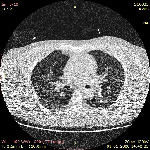

In [126]:
test_image

In [127]:
## Convert image to array
test_image = image.img_to_array(test_image)

In [128]:
## For single prediction change the dimension . 

test_image=test_image.reshape(1,150,150,3)

In [129]:
result = classifier.predict(test_image)

In [130]:
result = result.round()

In [131]:
result

array([[1.]], dtype=float32)

In [132]:
## Class label of dog and cat

if result == 1:
    prediction = 'Not_cancer'
else:
    prediction = 'cancer'
    

In [133]:
prediction

'Not_cancer'